<img src="img/python-logo-notext.svg"
     style="display:block;margin:auto;width:10%"/>
<h1 style="text-align:center;">Python: Forecasting</h1>
<h2 style="text-align:center;">Coding Akademie München GmbH</h2>
<br/>
<div style="text-align:center;">Dr. Matthias Hölzl</div>
<div style="text-align:center;">Allaithy Raed</div>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('airline_passengers.csv',
                 index_col='Month', parse_dates=True)
df.index.freq = 'MS'

In [2]:
df.size

144

In [3]:
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

### Train/Test Split

In [4]:
train_data = df.iloc[:108]
test_data = df.iloc[108:]

### Erstellen des Modesls, Fitting

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                             trend='mul',
                             seasonal='mul',
                             seasonal_periods=12)
fitted_model = model.fit()

### Evaluierung mit Testdaten

In [8]:
test_predictions = fitted_model.forecast(36)
test_predictions.rename("Holt-Winters Forecast");

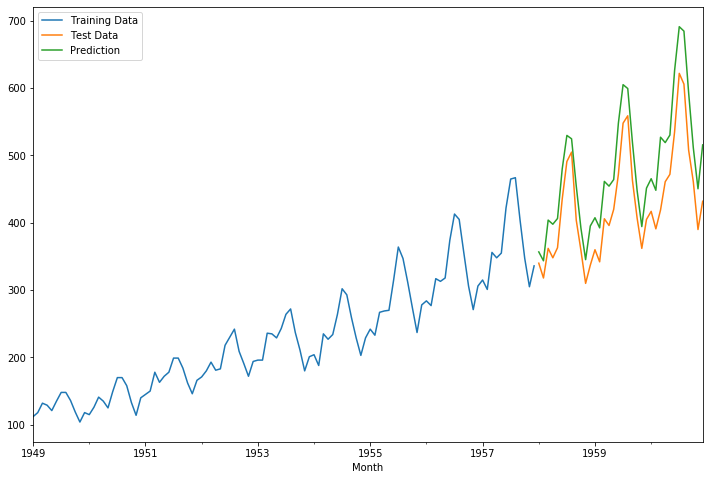

In [12]:
train_data['Thousands of Passengers'].plot(legend=True,
                                           label='Training Data',
                                           figsize=(12, 8))
test_data['Thousands of Passengers'].plot(legend=True,
                                          label='Test Data')
test_predictions.plot(legend=True, label='Prediction');

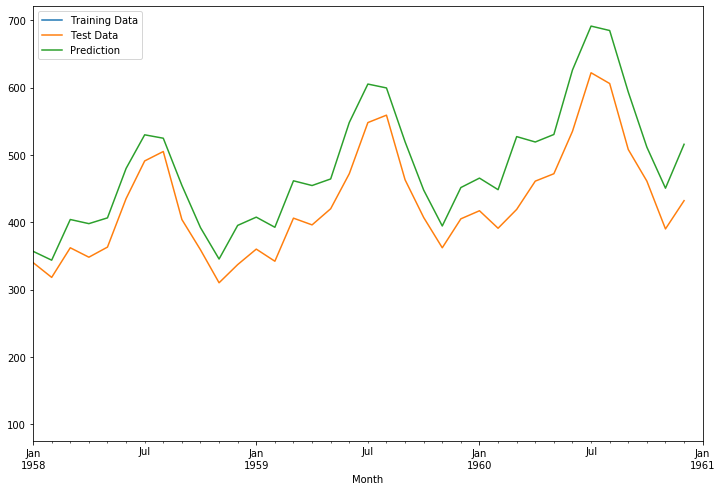

In [13]:
train_data['Thousands of Passengers'].plot(legend=True,
                                           label='Training Data',
                                           figsize=(12, 8))
test_data['Thousands of Passengers'].plot(legend=True,
                                          label='Test Data')
test_predictions.plot(legend=True, label='Prediction',
                     xlim=['1958-01-01','1961-01-01']);

## Evaluierung mit Metriken

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
mean_absolute_error(test_data, test_predictions)

53.163265674782

In [16]:
mean_squared_error(test_data, test_predictions)

3200.5396503496227

In [17]:
np.sqrt(mean_squared_error(test_data, test_predictions))

56.57331217411283

In [18]:
test_data.describe()

Thousands of Passengers
count                36.000000
mean                428.500000
std                  79.329152
min                 310.000000
25%                 362.000000
50%                 412.000000
75%                 472.000000
max                 622.000000

## Vorhersage

In [20]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],
                                   trend='mul',
                                   seasonal='mul',
                                   seasonal_periods=12).fit()

In [21]:
forecast_predictions = final_model.forecast(36)

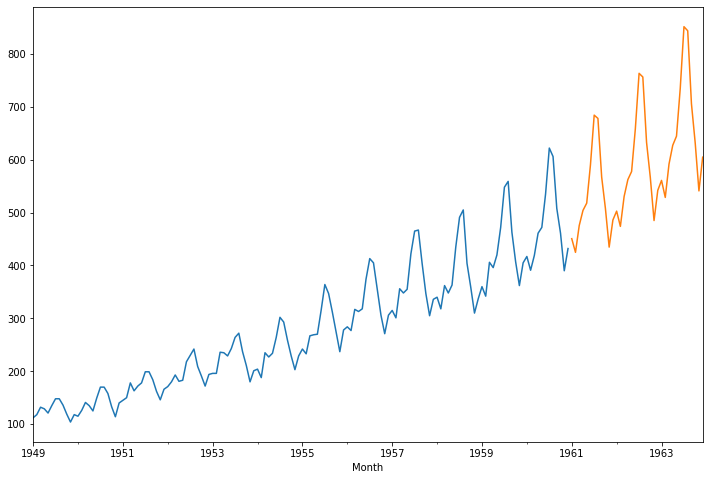

In [23]:
df['Thousands of Passengers'].plot(figsize=(12, 8))
forecast_predictions.plot();